<a href="https://colab.research.google.com/github/anjaliharidevan-glitch/Internship/blob/main/health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test=pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')
sample=pd.read_csv('/content/sample_submission.csv')

In [ ]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [ ]:
test.shape

(21805, 13)

In [ ]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
train.shape

(50882, 14)

In [ ]:
for column in test.columns:
    print(f"Unique values in column '{column}':")
    print(test[column].unique())
    print("\n")

Unique values in column 'ID':
[50883 50884 50885 ... 72685 72686 72687]


Unique values in column 'City_Code':
['C1' 'C4' 'C3' 'C2' 'C13' 'C18' 'C16' 'C17' 'C11' 'C7' 'C21' 'C34' 'C14'
 'C8' 'C12' 'C6' 'C10' 'C9' 'C23' 'C32' 'C26' 'C15' 'C24' 'C20' 'C19' 'C5'
 'C28' 'C30' 'C25' 'C29' 'C27' 'C33' 'C22' 'C36' 'C35' 'C31']


Unique values in column 'Region_Code':
[ 156    7  564 ... 4778 4555 5204]


Unique values in column 'Accomodation_Type':
['Owned' 'Rented']


Unique values in column 'Reco_Insurance_Type':
['Individual' 'Joint']


Unique values in column 'Upper_Age':
[30 69 28 23 75 24 56 41 22 38 42 31 35 46 44 29 60 54 27 71 68 55 36 59
 72 33 47 63 45 66 26 67 64 57 51 37 70 25 65 34 21 52 61 58 49 43 48 40
 50 39 32 53 62 19 20 18 74 73]


Unique values in column 'Lower_Age':
[30 68 28 23 75 24 56 41 22 37 38 42 31 35 44 29 60 54 27 71 66 36 26 47
 63 45 59 67 64 57 43 46 61 25 70 69 65 72 55 34 21 52 19 58 33 53 49 48
 40 50 39 32 17 51 74 62 20 18 73 16]


Unique values in colu

In [ ]:
sample.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,1


In [ ]:
sample.shape

(21805, 2)

In [ ]:
for column in train.columns:
    print(f"Unique values in column '{column}':")
    print(train[column].unique())
    print("\n")

Unique values in column 'ID':
[    1     2     3 ... 50880 50881 50882]


Unique values in column 'City_Code':
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']


Unique values in column 'Region_Code':
[3213 1117 3732 ... 5326 6149 5450]


Unique values in column 'Accomodation_Type':
['Rented' 'Owned']


Unique values in column 'Reco_Insurance_Type':
['Individual' 'Joint']


Unique values in column 'Upper_Age':
[36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47]


Unique values in column 'Lower_Age':
[36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17]


Unique values in colu

In [ ]:
for column in sample.columns:
    print(f"Unique values in column '{column}':")
    print(sample[column].unique())
    print("\n")

Unique values in column 'ID':
[50883 50884 50885 ... 72685 72686 72687]


Unique values in column 'Response':
[ 0  1 11]




In [ ]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,1,2,3,4,5,6,7,8,9,10
City_Code,C3,C5,C5,C24,C8,C9,C3,C1,C15,C1
Region_Code,3213,1117,3732,4378,2190,1785,679,3175,3497,530
Accomodation_Type,Rented,Owned,Owned,Owned,Rented,Rented,Owned,Owned,Owned,Owned
Reco_Insurance_Type,Individual,Joint,Individual,Joint,Individual,Individual,Individual,Joint,Joint,Joint
Upper_Age,36,75,32,52,44,52,28,75,52,59
Lower_Age,36,22,32,48,44,52,28,73,43,26
Is_Spouse,No,No,No,No,No,No,No,Yes,No,Yes
Health Indicator,X1,X2,NaN,X1,X2,X2,NaN,X4,X1,NaN
Holding_Policy_Duration,14+,NaN,1.0,14+,3.0,5.0,NaN,9.0,14.0,7.0


In [ ]:
for col in train.select_dtypes(include=['object']).columns:
    unique_vals = train[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'City_Code' (36 unique values):
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
--------------------------------------------------
Column 'Accomodation_Type' (2 unique values):
['Rented' 'Owned']
--------------------------------------------------
Column 'Reco_Insurance_Type' (2 unique values):
['Individual' 'Joint']
--------------------------------------------------
Column 'Is_Spouse' (2 unique values):
['No' 'Yes']
--------------------------------------------------
Column 'Health Indicator' (9 unique values):
['X1' 'X2' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
--------------------------------------------------
Column 'Holding_Policy_Duration' (15 unique values):
['14+' '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
--------------------------------------------------


In [ ]:
for col in train.columns:
    q_count = train[col][train[col] == '?'].count()
    nan_count = train[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing > 0:
        print(f"column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

column 'Health Indicator': '?' = 0, NaN = 11691, Total missing = 11691
column 'Holding_Policy_Duration': '?' = 0, NaN = 20251, Total missing = 20251
column 'Holding_Policy_Type': '?' = 0, NaN = 20251, Total missing = 20251


In [ ]:
import numpy as np

df_missing = train.replace("?", np.nan)

missing_proportions = df_missing.isna().mean()

for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

Column 'Health Indicator': 22.98% missing (including '?')
Column 'Holding_Policy_Duration': 39.80% missing (including '?')
Column 'Holding_Policy_Type': 39.80% missing (including '?')


In [ ]:
for col in train_cleaned.columns:
    if train_cleaned[col].dtype == object:
         print(col,train_cleaned[col][train_cleaned[col] == '?'].count())

City_Code 0
Accomodation_Type 0
Reco_Insurance_Type 0
Is_Spouse 0
Health Indicator 0
Holding_Policy_Duration 0


In [ ]:
import numpy as np

train.replace('?', np.nan, inplace=True)

cols_with_missing = ['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']

train_cleaned = train.dropna(subset=cols_with_missing).reset_index(drop=True)

print(f"Original DataFrame shape: {train.shape}")
print(f"DataFrame shape after dropping rows with missing values: {train_cleaned.shape}")

print("\nMissing values in cleaned DataFrame:")
print(train_cleaned.isnull().sum())

Original DataFrame shape: (50882, 14)
DataFrame shape after dropping rows with missing values: (23548, 14)

Missing values in cleaned DataFrame:
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [ ]:
train_cleaned['Response'].value_counts()

,count
Response,
0,17848
1,5700


In [ ]:
train_cleaned['Response'] = train_cleaned['Response'].replace(0, 0)
train_cleaned['Response'] = train_cleaned['Response'].replace(1, 1)
train_cleaned['Response'].value_counts()

,count
Response,
0,17848
1,5700


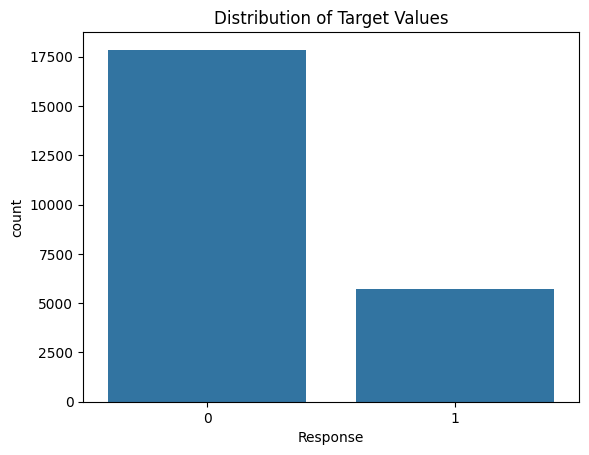

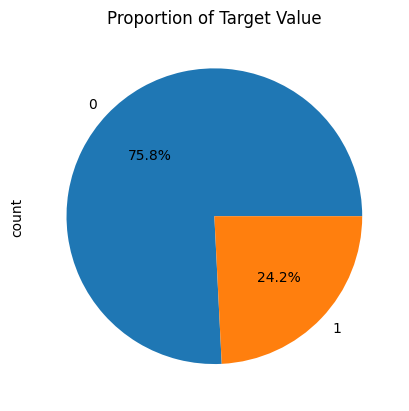

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Response", data=train_cleaned)
plt.title("Distribution of Target Values")
plt.show()


train_cleaned['Response'].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

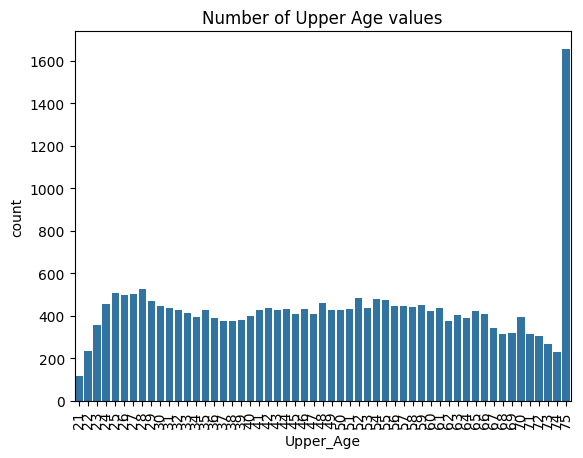

Proportion of Upper Age
Upper_Age
75    7.028198
28    2.233735
25    2.165789
27    2.140309
26    2.106336
52    2.063870
54    2.042636
55    2.017156
29    1.987430
48    1.957703
24    1.932224
59    1.915237
30    1.902497
57    1.898250
56    1.889757
58    1.885510
31    1.860031
61    1.855784
42    1.855784
53    1.851537
51    1.838797
44    1.834551
46    1.834551
35    1.826057
41    1.826057
32    1.826057
43    1.817564
49    1.813317
50    1.809071
65    1.804824
60    1.800578
33    1.762358
45    1.736878
66    1.736878
47    1.732631
63    1.715645
40    1.694411
70    1.681671
34    1.677425
36    1.664685
64    1.664685
39    1.609479
62    1.600985
37    1.592492
38    1.592492
23    1.507559
67    1.456599
69    1.354680
71    1.337693
68    1.337693
72    1.290980
73    1.142348
22    1.002208
74    0.980975
21    0.505351
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Upper_Age", data=train_cleaned)
plt.xticks(rotation=90)
plt.title("Number of Upper Age values")
plt.show()

print("Proportion of Upper Age")
print(train_cleaned['Upper_Age'].value_counts(normalize=True) * 100)

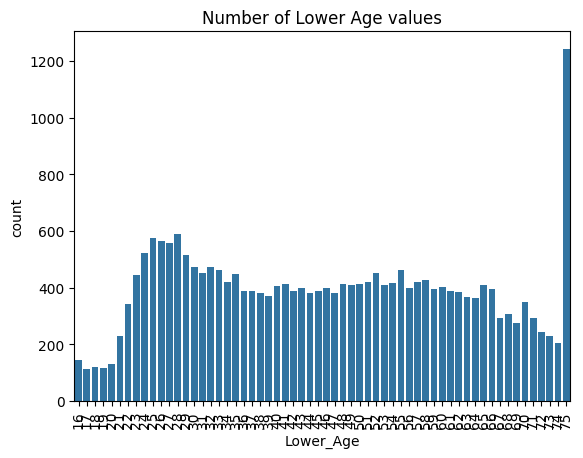

Proportion of Lower Age
Lower_Age
75    5.274333
28    2.501274
25    2.441821
26    2.390861
27    2.361135
24    2.220995
29    2.191269
32    2.008663
30    2.008663
33    1.966197
55    1.961950
31    1.923730
52    1.919484
35    1.898250
23    1.889757
58    1.817564
57    1.783591
51    1.783591
34    1.779344
54    1.766604
41    1.758111
50    1.753864
48    1.749618
65    1.736878
53    1.736878
49    1.732631
40    1.728385
60    1.707151
46    1.690165
43    1.690165
56    1.685918
66    1.673178
59    1.673178
61    1.651945
45    1.651945
37    1.651945
36    1.651945
42    1.643452
62    1.634958
47    1.622218
44    1.617972
38    1.617972
39    1.575505
63    1.558519
64    1.545779
70    1.477833
22    1.448106
68    1.307967
71    1.240020
67    1.235774
69    1.167827
72    1.040428
21    0.972482
73    0.972482
74    0.870562
16    0.611517
20    0.547817
18    0.509597
19    0.492611
17    0.475624
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Lower_Age", data=train_cleaned)
plt.xticks(rotation=90)
plt.title("Number of Lower Age values")
plt.show()

print("Proportion of Lower Age")
print(train_cleaned['Lower_Age'].value_counts(normalize=True) * 100)

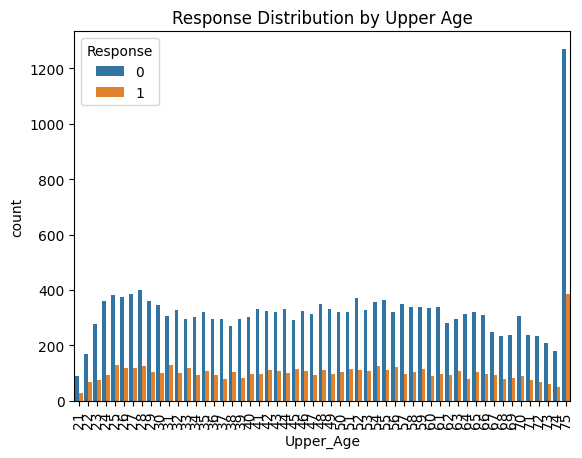

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Upper_Age", hue="Response", data=train_cleaned)
plt.xticks(rotation=90)
plt.title("Response Distribution by Upper Age")
plt.show()

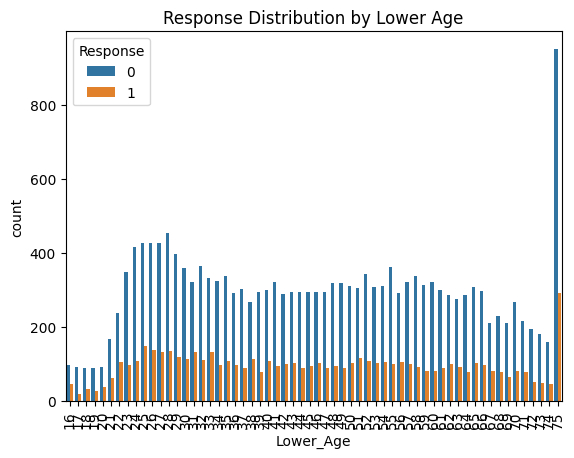

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Lower_Age", hue="Response", data=train_cleaned)
plt.xticks(rotation=90)
plt.title("Response Distribution by Lower Age")
plt.show()

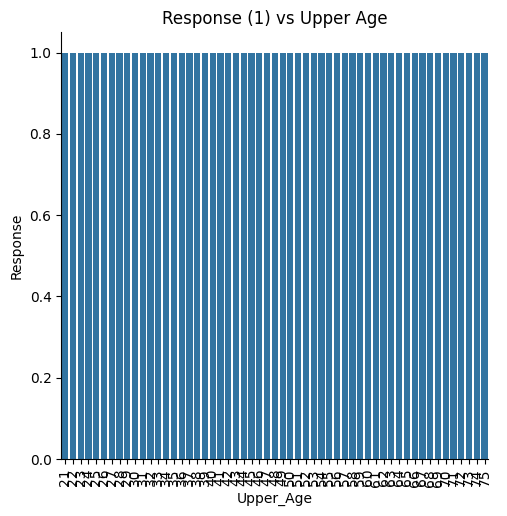

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Upper_Age", y="Response", data=train_cleaned[train_cleaned['Response'] == 1], kind="bar", height=5)
plt.xticks(rotation=90)
plt.title("Response (1) vs Upper Age")
plt.show()

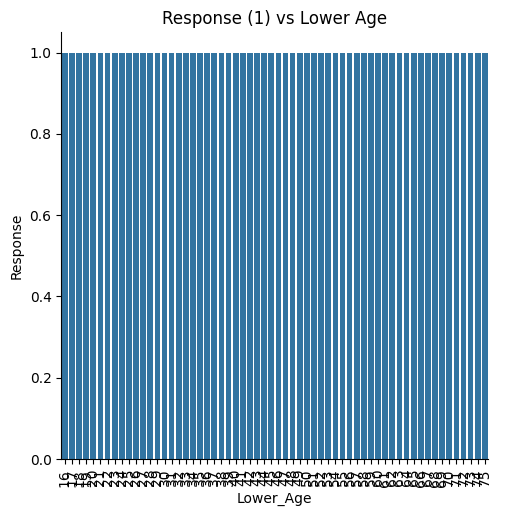

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Lower_Age", y="Response", data=train_cleaned[train_cleaned['Response'] == 1], kind="bar", height=5)
plt.xticks(rotation=90)
plt.title("Response (1) vs Lower Age")
plt.show()

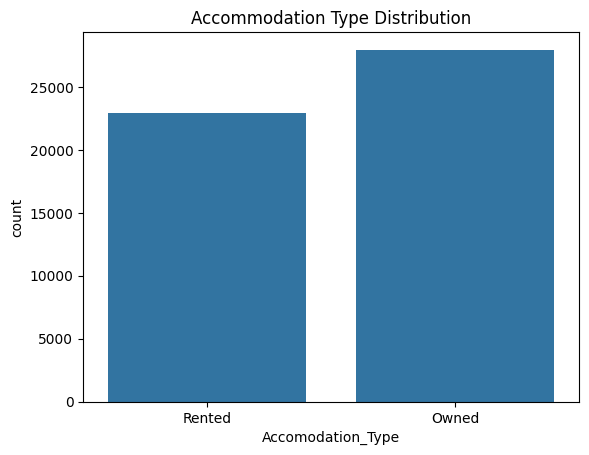

In [ ]:
sns.countplot(x='Accomodation_Type', data=train)
plt.title('Accommodation Type Distribution')
plt.show()


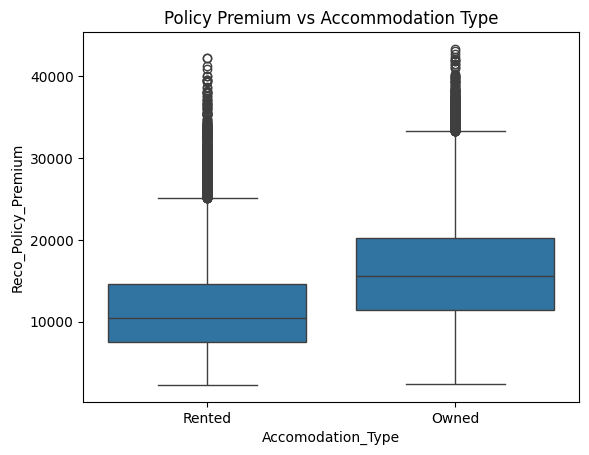

In [ ]:
sns.boxplot(x='Accomodation_Type', y='Reco_Policy_Premium', data=train)
plt.title('Policy Premium vs Accommodation Type')
plt.show()


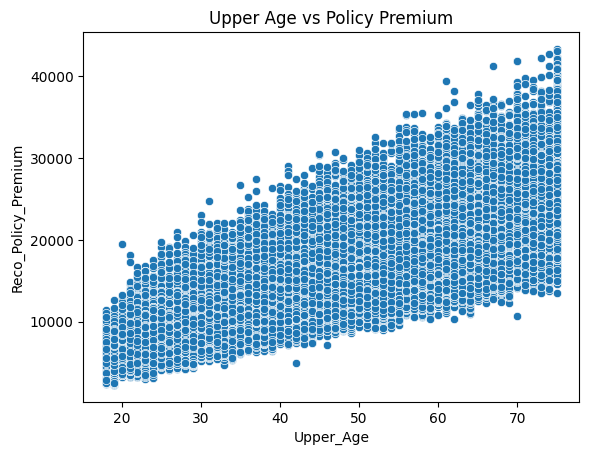

In [ ]:
sns.scatterplot(x='Upper_Age', y='Reco_Policy_Premium', data=train)
plt.title('Upper Age vs Policy Premium')
plt.show()

/tmp/ipython-input-2311793782.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_cleaned.loc[(train_cleaned['Response'] == 0),'Reco_Policy_Premium'] , color='b',shade=True,label='Response 0')
/tmp/ipython-input-2311793782.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_cleaned.loc[(train_cleaned['Response'] == 1),'Reco_Policy_Premium'] , color='r',shade=True, label='Response 1')


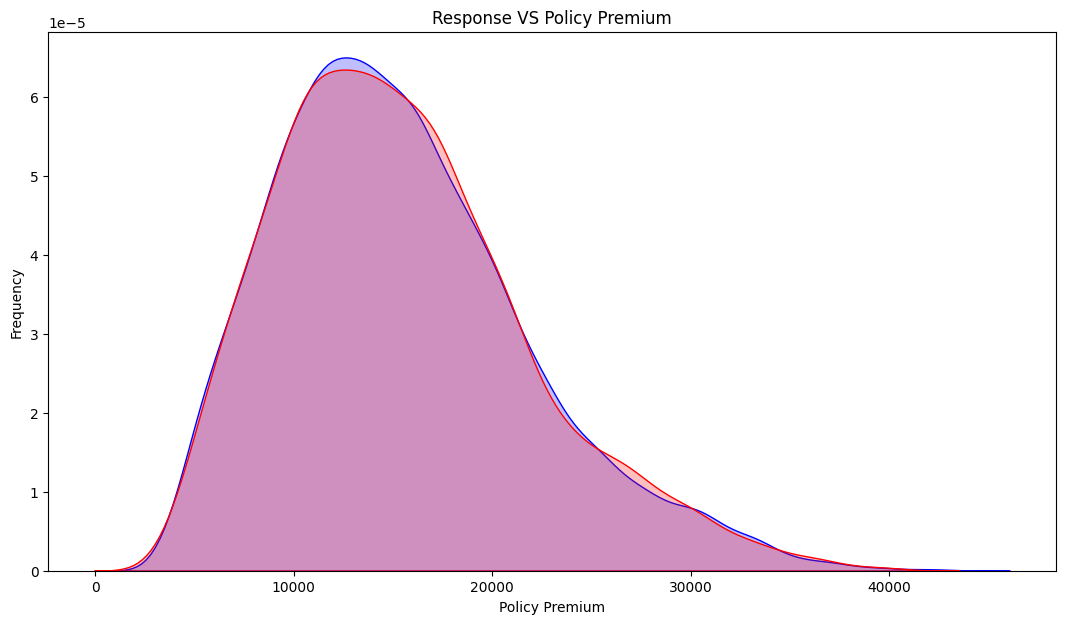

In [ ]:
fig = plt.figure(figsize=(13,7))
ax = sns.kdeplot(train_cleaned.loc[(train_cleaned['Response'] == 0),'Reco_Policy_Premium'] , color='b',shade=True,label='Response 0')
ax = sns.kdeplot(train_cleaned.loc[(train_cleaned['Response'] == 1),'Reco_Policy_Premium'] , color='r',shade=True, label='Response 1')
ax.set(xlabel='Policy Premium', ylabel='Frequency')
plt.title('Response VS Policy Premium')
plt.show()

/tmp/ipython-input-3487144111.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Upper_Age'] , color='b',shade=True,label='Negative')
/tmp/ipython-input-3487144111.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Upper_Age'] , color='r',shade=True, label='Positive')


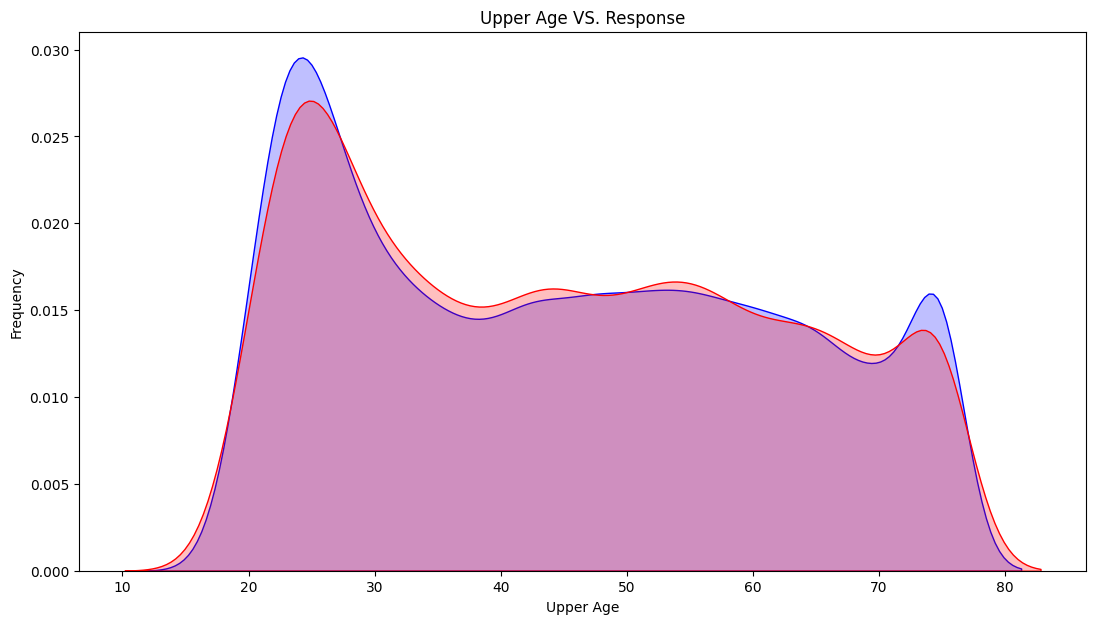

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Upper_Age'] , color='b',shade=True,label='Negative')
ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Upper_Age'] , color='r',shade=True, label='Positive')
ax.set(xlabel='Upper Age', ylabel='Frequency')
plt.title('Upper Age VS. Response')
plt.show()

In [ ]:
train_encoded = pd.get_dummies(train_cleaned, columns=['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type'])

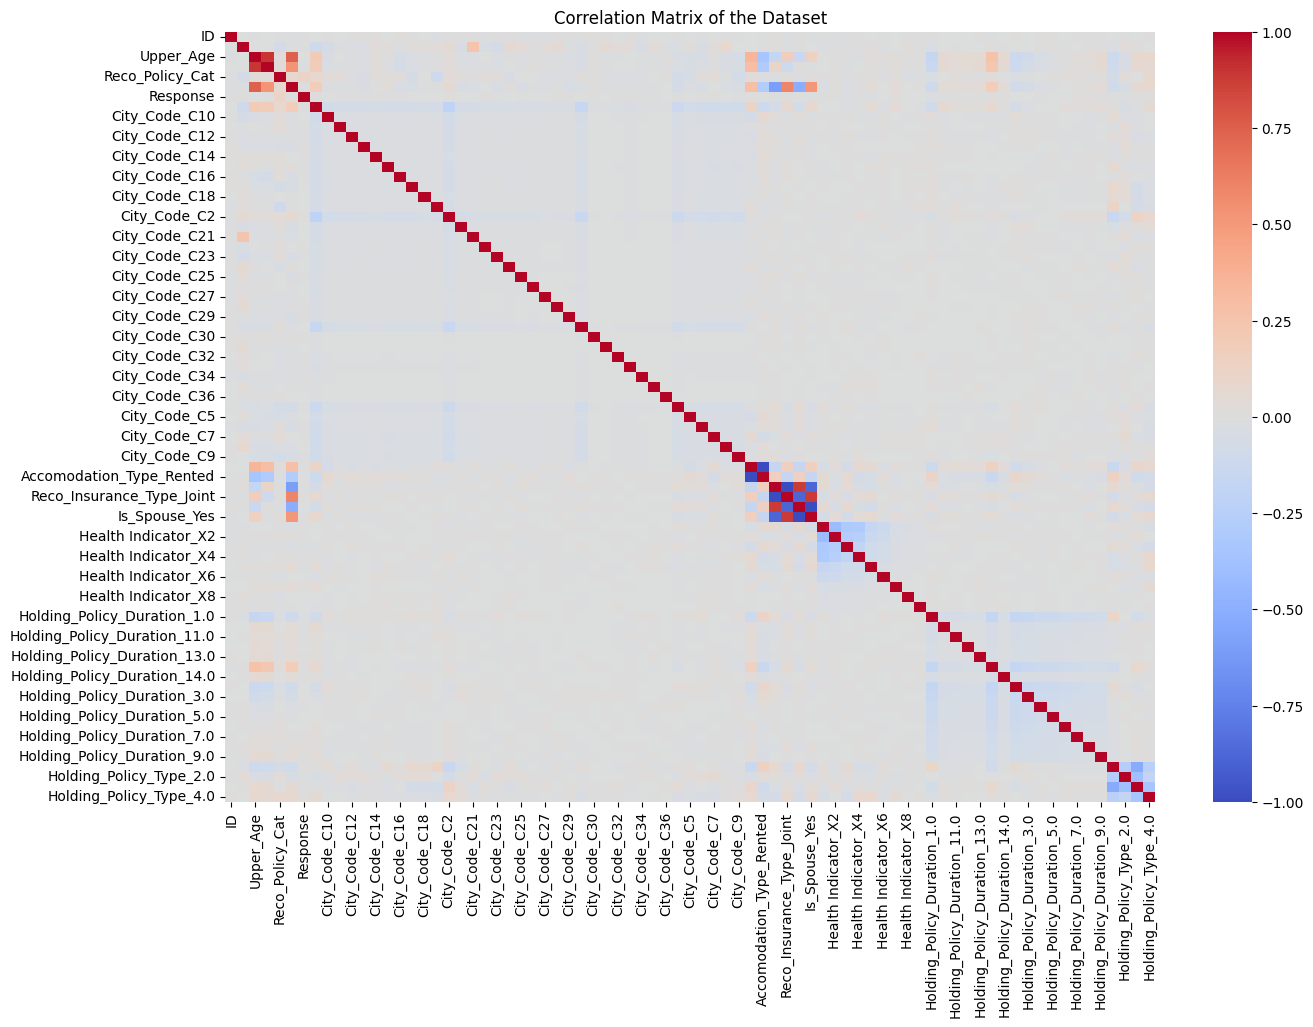

In [ ]:
correlation_matrix = train_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f") # Removed annot=True because of large number of features
plt.title("Correlation Matrix of the Dataset")
plt.show()

OBSERVATIONS

*The dataset contains information about individuals and their insurance policies, with a target variable 'Response' indicating whether they are interested in the recommended policy (1) or not (0).

*There are missing values in the 'Health Indicator', 'Holding_Policy_Duration', and 'Holding_Policy_Type' columns, which were handled by dropping rows with missing data for these columns.

*The target variable 'Response' is imbalanced, with significantly more instances of '0' than '1'.

*The 'Upper_Age' and 'Lower_Age' columns show a wide
distribution of ages in the dataset.

*Visualizations were created to explore the relationship between age, policy premium, accommodation type, and the target variable 'Response'.

*Categorical features have been one-hot encoded for potential use in modeling.

*A correlation matrix was generated to visualize the relationships between variables.
